In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [224]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\month\monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [225]:
df.shape

(847, 2)

In [226]:
print(f"Data range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from - 1950-01 to 2020-07


In [227]:
date = pd.date_range (start='1/1/1950', end= '8/1/2020', freq ='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [228]:
df['Month']= date
df.drop('Date', axis=1, inplace=True)
df=df.set_index('Month')
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


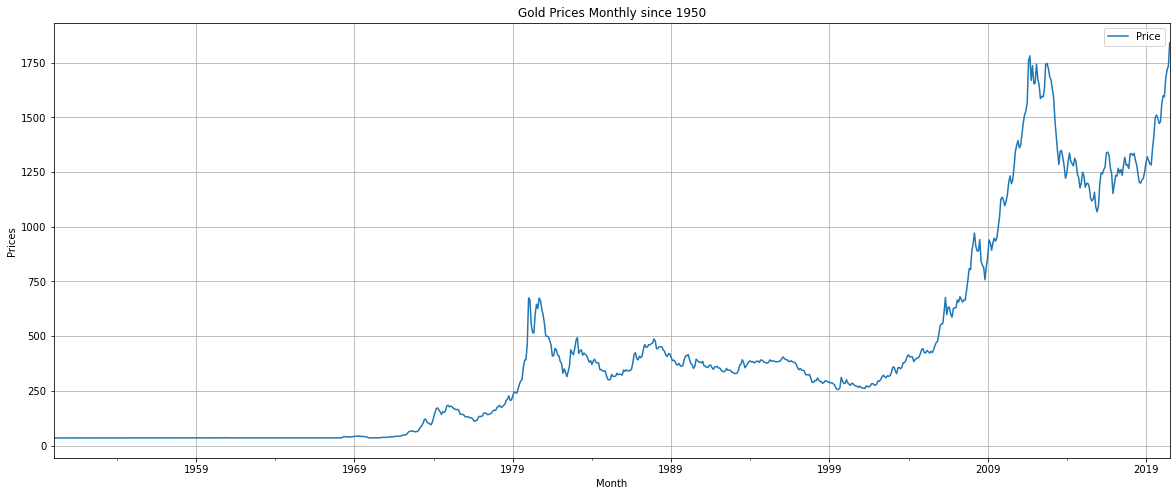

In [229]:
df.plot(figsize=(20,8))
plt.title("Gold Prices Monthly since 1950")
plt.xlabel("Month")
plt.ylabel("Prices")
plt.grid();

In [230]:
round(df.describe(),3)
          

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


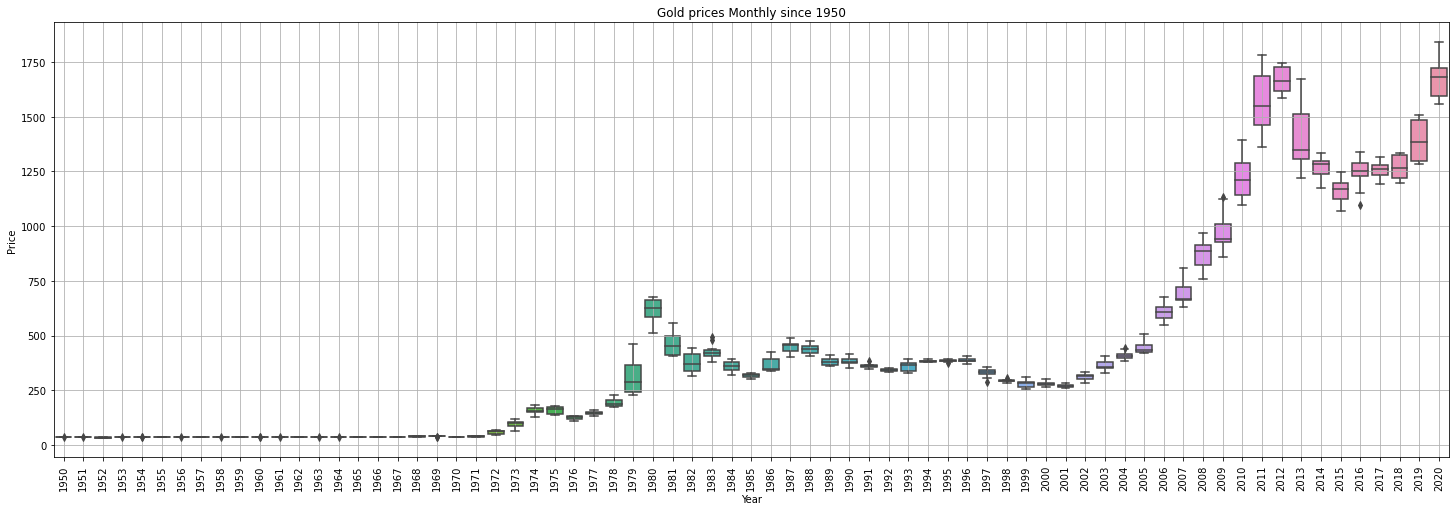

In [231]:
_,  ax = plt.subplots(figsize=(25,8))
sns.boxplot(x= df.index.year ,  y= df.values[:,0], ax=ax)
plt.title("Gold prices Monthly since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();  

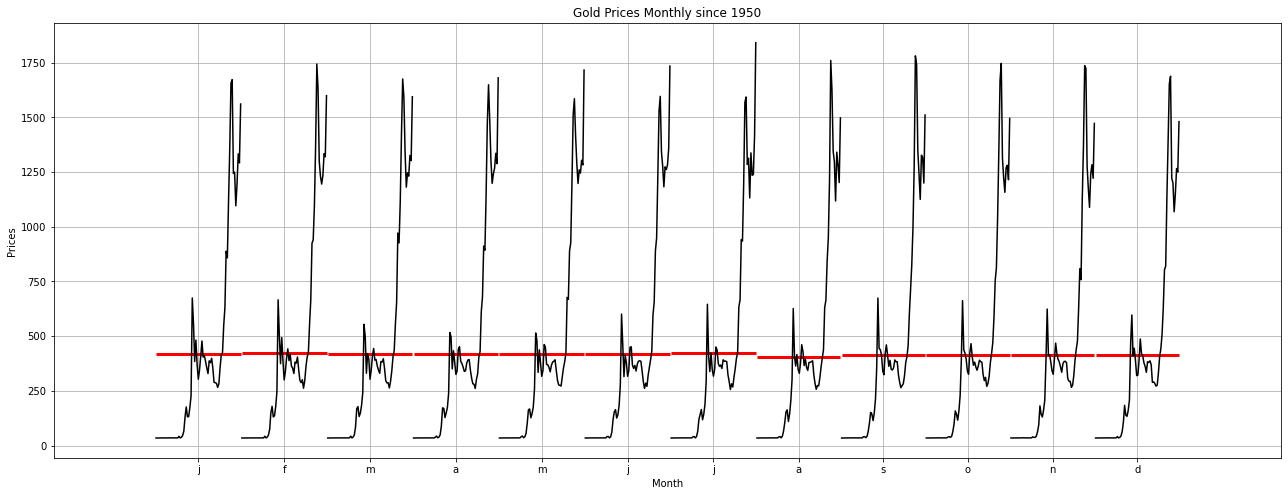

In [232]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax= plt.subplots(figsize=(22,8))
month_plot(df, ylabel='Gold prices', ax=ax)
plt.title("Gold Prices Monthly since 1950")
plt.xlabel("Month")
plt.ylabel("Prices")
plt.grid();

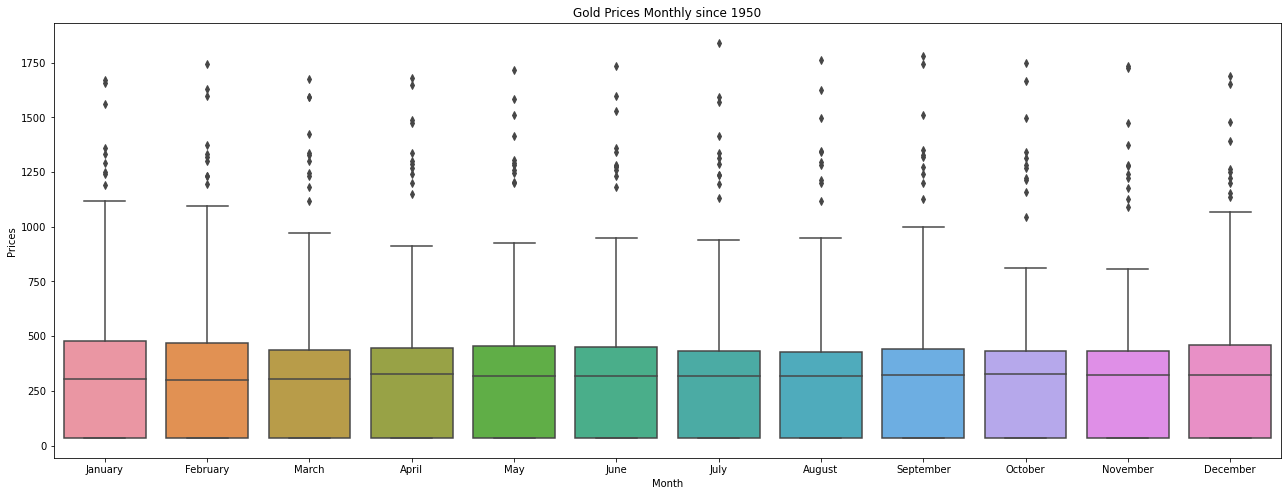

In [233]:
_, ax= plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:,0], ax=ax)
plt.title("Gold Prices Monthly since 1950")
plt.xlabel("Month")
plt.ylabel("Prices")
plt.show();

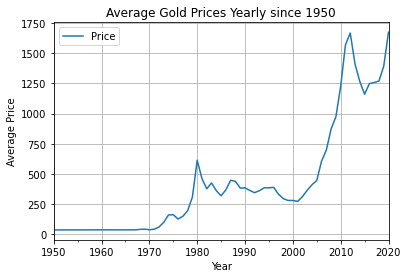

In [234]:
df_yearly_sum= df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Average Gold Prices Yearly since 1950")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid();

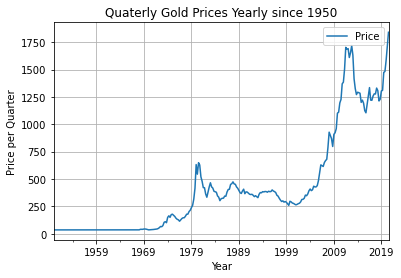

In [235]:
df_quarterly_sum= df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Quaterly Gold Prices Yearly since 1950")
plt.xlabel("Year")
plt.ylabel("Price per Quarter")
plt.grid();

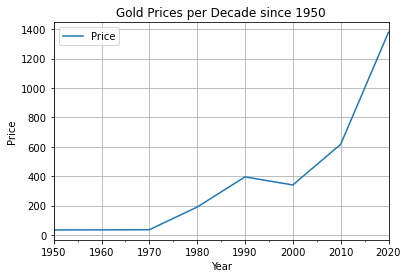

In [236]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Gold Prices per Decade since 1950")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid();

In [237]:
df_1= df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year). std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1["Mean"])*100).round(2)
df_1.tail()

,Mean,Std,Cov_pct
Month,,,
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32
2019,1392.585750,94.198272,6.76
2020,1674.830857,98.431766,5.88


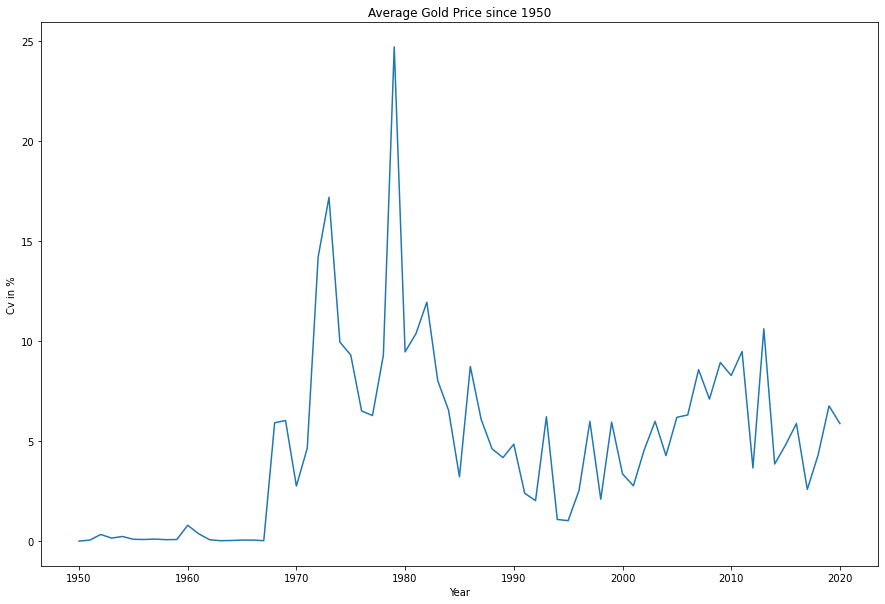

In [238]:
fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("Average Gold Price since 1950")
plt.xlabel("Year")
plt.ylabel('Cv in %')
plt.show()

In [239]:
train = df[df.index.year<=2015]
test = df[df.index.year>2015]

In [240]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


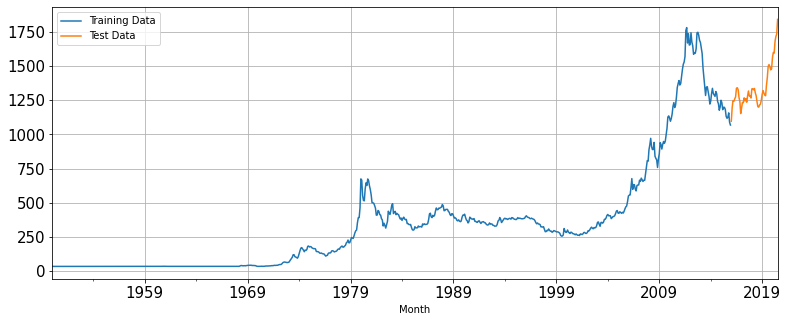

In [241]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5), fontsize=15)
plt.grid();
plt.legend(["Training Data", "Test Data"])
plt.show()

In [242]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range (len(test))]
len(train_time), len(test_time)

(792, 55)

In [243]:
LR_train= train.copy()
LR_test=test.copy()

In [244]:
LR_train['time']= train_time
LR_test['time']=test_time

In [245]:
lr=LinearRegression()
lr.fit(LR_train[['time']], LR_train["Price"].values)

LinearRegression()

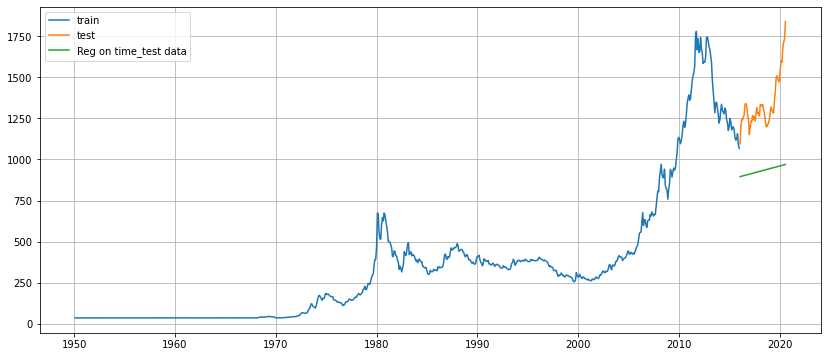

In [246]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast']= test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(LR_test['forecast'], label='Reg on time_test data')
plt.legend (loc= 'best')
plt.grid();

In [247]:
def mape(actual, pred):
    return round (np.mean(abs(actual -pred)/actual)*100,2)

In [248]:
mape_model1_test=mape(test['Price'].values, test_predictions_model1)
print('MAPE IS %3.3f'%(mape_model1_test), "%")

MAPE IS 29.760 %


In [249]:
results=pd.DataFrame({'Test mape(%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test mape(%)
Regression on Time,29.76


In [250]:
Naive_train=train.copy()
Naive_test=test.copy()

In [251]:
Naive_test['naive']=np.asarray(train['Price']) [len(np.array(train['Price']))-1]
Naive_test['naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

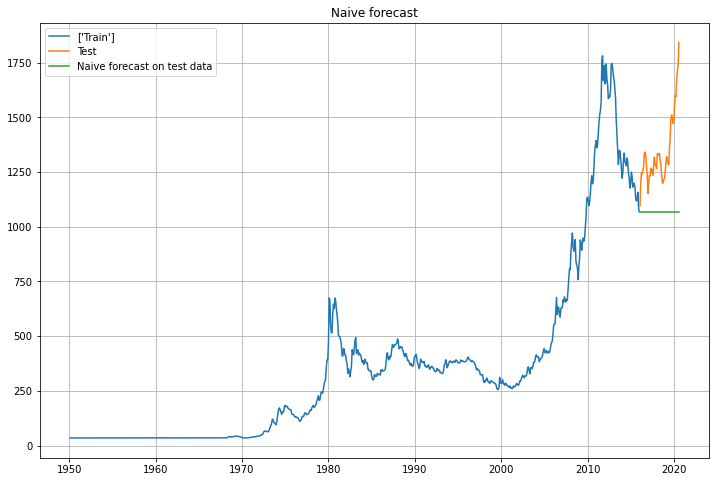

In [252]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label=['Train'])
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'],label="Naive forecast on test data")
plt.legend(loc="best")
plt.title("Naive forecast")
plt.grid();

In [253]:
mape_model2_test= mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive Forecast on the test data, Mape is %3.3f"%(mape_model2_test),"%")

For Naive Forecast on the test data, Mape is 19.380 %


In [254]:
resultsDF_2= pd.DataFrame({'Test Mape(%)':[mape_model2_test]}, index=['Naive Model'])
results=pd.concat([results, resultsDF_2])
results

,Test mape(%),Test Mape(%)
Regression on Time,29.76,NaN
Naive Model,NaN,19.38


In [255]:
final_model=ExponentialSmoothing(df,
                                 trend="additive",
                                 seasonal="additive").fit(smoothing_level=0.4, 
                                                        smoothing_trend=0.3,
                                                        smoothing_seasonal=0.6)


In [256]:
MAPE_final_model= mape(df['Price'].values, final_model. fittedvalues)
print('MAPE is', MAPE_final_model)


MAPE is 17.24


In [257]:
predictions=final_model.forecast(steps=len(test))

In [258]:
pred_df=pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof=1),
                      'predictions' : predictions,
                      'upper_CI': predictions + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,predictions,upper_CI
2020-08-31,1684.720326,1792.871299,1901.022272
2020-09-30,1615.306441,1723.457414,1831.608387
2020-10-31,1538.568353,1646.719325,1754.870298
2020-11-30,1476.759049,1584.910022,1693.060995
2020-12-31,1459.327708,1567.478681,1675.629654


<function matplotlib.pyplot.show(close=None, block=None)>

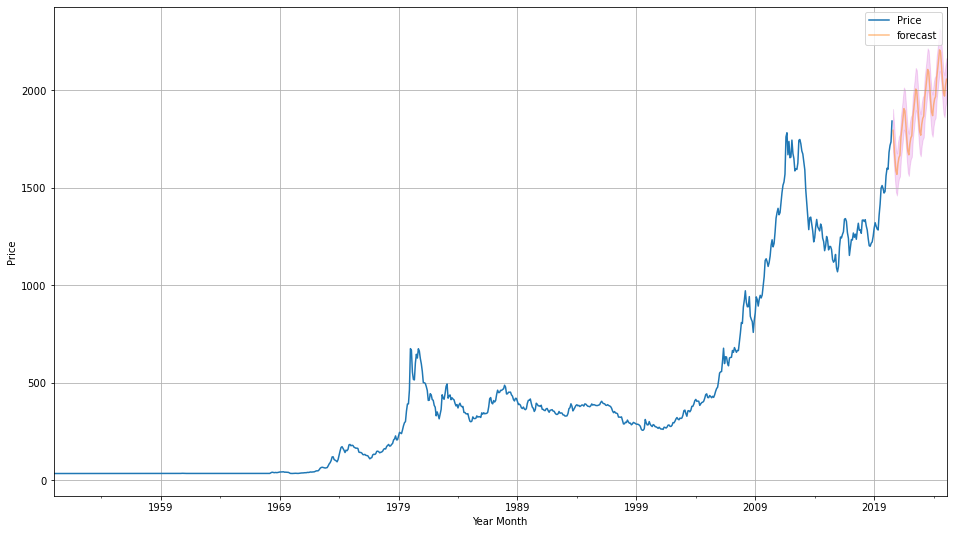

In [259]:
axis=df.plot(label= 'Actual', figsize=(16,9))
pred_df['predictions'].plot(ax=axis, label='forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m',alpha=.15)
axis.set_xlabel('Year Month')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid();
plt.show